In [2]:
from langgraph.graph import StateGraph, START , END
from typing import TypedDict

In [3]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int
    
    sr: float
    bpb: float
    boundary_percentage: float
    summary: str

In [4]:
def calculate_sr(state: BatsmanState) -> BatsmanState:
    sr = (state['runs'] / state['balls']) * 100
    return {'sr': sr}

def calculate_bpb(state: BatsmanState) -> BatsmanState:
    bpb = state['balls'] / (state['fours'] + state['sixes'])
    return {'bpb': bpb}

def calculate_boundary_percentage(state: BatsmanState) -> BatsmanState:
    total_boundaries = state['fours'] + state['sixes']
    boundary_percentage = (total_boundaries / state['balls']) * 100 if state['balls'] > 0 else 0
    return {'boundary_percentage': boundary_percentage}

def summarize(state: BatsmanState) -> str:
    summary = f"Batsman scored {state['runs']} runs off {state['balls']} balls with a strike rate of {state['sr']:.2f}.  He hit {state['fours']} fours and {state['sixes']} sixes.  Boundary percentage: {state['boundary_percentage']:.2f}%."
    return {'summary': summary}
    
    

In [5]:
graph = StateGraph(BatsmanState)

graph.add_node('calculate_sr', calculate_sr)
graph.add_node('calculate_bpb', calculate_bpb)
graph.add_node('calculate_boundary_percentage', calculate_boundary_percentage)
graph.add_node('summarize', summarize)

graph.add_edge(START, 'calculate_sr')
graph.add_edge(START, 'calculate_bpb')
graph.add_edge(START, 'calculate_boundary_percentage')

graph.add_edge('calculate_sr', 'summarize')
graph.add_edge('calculate_bpb', 'summarize')
graph.add_edge('calculate_boundary_percentage', 'summarize')

graph.add_edge('summarize', END)

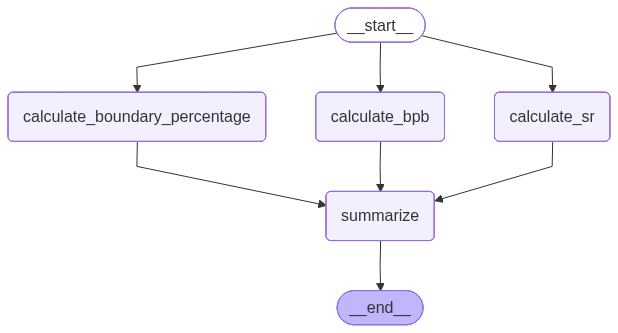

In [6]:
workflow = graph.compile()
workflow

In [ ]:
initial_state: BatsmanState = {
    'runs': 120,
    'balls': 100,
    'fours': 10,
    'sixes': 5,
    'sr': 0.0,
    'bpb': 0.0,
    'boundary_percentage': 0.0,
    'summary': ''
} 

final_state = workflow.invoke(initial_state)
print(final_state)

{'runs': 120, 'balls': 100, 'fours': 10, 'sixes': 5, 'sr': 120.0, 'bpb': 6.666666666666667, 'boundary_percentage': 15.0, 'summary': 'Batsman scored 120 runs off 100 balls with a strike rate of 120.00.  He hit 10 fours and 5 sixes.  Boundary percentage: 15.00%.'}
